Planet monthly mosaic data availabiblity 

From 2020-09 to last calendar month (2024-04)

In [1]:
import folium
from datetime import datetime, timedelta

import ipywidgets
from IPython.display import HTML, display

In [26]:
def get_last_calendar_month():
    # Get the current date
    today = datetime.today()
    
    # Calculate the first day of the current month
    first_day_of_current_month = today.replace(day=1)
    
    # Subtract one day to get the last day of the previous month
    last_day_of_last_month = first_day_of_current_month - timedelta(days=1)
    
    # Extract the year and month from the last day of the previous month
    year = last_day_of_last_month.year
    month = last_day_of_last_month.month
    
    return year, month

In [73]:
current_year, current_month = get_last_calendar_month()
out = ipywidgets.Output(layout={'border': '1px solid black'})

year_list = [x for x in range(2020, current_year+1, 1)]
year_wdiget = ipywidgets.Dropdown(
    options=year_list,
    value=year_list[-1],
    description='Year:',
    disabled=False,
)

month_list = [x for x in range(1, current_month+1, 1)]
month_wdiget = ipywidgets.Dropdown(
    options=month_list,
    value=month_list[-1],
    description='Month:',
    disabled=False,
)

button = ipywidgets.Button(
    description='Display Map',
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    icon='map' # (FontAwesome names without the `fa-` prefix)
)

def on_dropdown_change(change):
    change = change['new']
    if change == 2020:
        month_list = [9, 10, 11, 12]
    elif change == int(current_year):
        month_list = [x for x in range(1, current_month+1, 1)]
    else:
        month_list = [x for x in range(1, 13, 1)]
    month_wdiget.options = month_list

planet_monthly = f"https://api.digitalearth.africa/planet/tiles/basemaps/v1/planet-tiles/planet_medres_visual_{year_wdiget.value:04d}-{month_wdiget.value:02d}_mosaic/gmap/"+"{z}/{x}/{y}.png"    
m = folium.Map(location=(0,20), tiles=planet_monthly, attr='Planet NICFI', zoom_start=4)

def button_click(b):
    planet_monthly = f"https://api.digitalearth.africa/planet/tiles/basemaps/v1/planet-tiles/planet_medres_visual_{year_wdiget.value:04d}-{month_wdiget.value:02d}_mosaic/gmap/"+"{z}/{x}/{y}.png"
    m = folium.Map(location=(0,20), tiles=planet_monthly, attr='Planet NICFI', zoom_start=4)
    out.clear_output()
    with out:
        display(m)

app = ipywidgets.AppLayout(
          left_sidebar=year_wdiget,
          center=month_wdiget,
          right_sidebar=button,)
year_wdiget.observe(on_dropdown_change, names='value')
button.on_click(button_click)
display(app)

with out:
    display(m)
out

AppLayout(children=(Dropdown(description='Year:', index=4, layout=Layout(grid_area='left-sidebar'), options=(2…

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

### Using Planet Basemap with DE Africa Services

In [74]:
from deafrica_tools.waterbodies import (
    get_geohashes,
    get_waterbodies,
    get_waterbody,
    get_time_series,
    display_time_series,
)

In [93]:
# Set the central latitude and longitude
lat =  7.2589
lon = 0.1978

# Set the buffer to load around the central coordinates
buffer = 0.15

# Compute the bounding box coordinates
xlim = (lon-buffer, lon+buffer)
ylim =  (lat+buffer, lat-buffer)

In [94]:
# Create a bounding box from study area coordinates
bbox = (xlim[0], ylim[1], xlim[1], ylim[0])

# Select all water bodies located within the bounding box
polygons = get_waterbodies(bbox, crs="EPSG:4326")

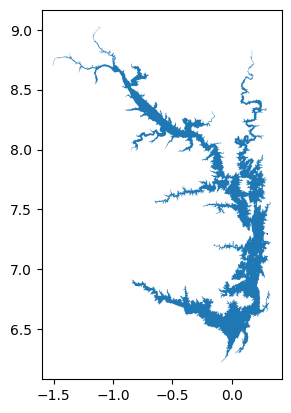

In [95]:
# Plot the waterbody polygons located within the bounding box
polygons.plot();

In [107]:
# Display last calendar month
year, month = get_last_calendar_month()
planet_monthly = f"https://api.digitalearth.africa/planet/tiles/basemaps/v1/planet-tiles/planet_medres_visual_{year:04d}-{month:02d}_mosaic/gmap/"+"{z}/{x}/{y}.png"
m = folium.Map(location=(lat, lon), tiles=planet_monthly, attr='Planet NICFI', zoom_start=8)

folium.GeoJson(polygons, zoom_on_click=True).add_to(m)
m

In [4]:
# Enable selection of layers

planet_202401 = "https://api.digitalearth.africa/planet/tiles/basemaps/v1/planet-tiles/planet_medres_visual_2024-01_mosaic/gmap/{z}/{x}/{y}.png"
planet_202402 = "https://api.digitalearth.africa/planet/tiles/basemaps/v1/planet-tiles/planet_medres_visual_2024-02_mosaic/gmap/{z}/{x}/{y}.png"

m=folium.Map(location=(0,20), zoom_start=6)
folium.TileLayer(planet_202401, attr='Planet NICFI', name='Planet NICFI 2024-01').add_to(m)
folium.TileLayer(planet_202402, attr='Planet NICFI', name='Planet NICFI 2024-02').add_to(m)
folium.LayerControl().add_to(m)
m

#Save this to a web app!
#m.save("select_planet.html")